#ToDo: 
#Process1 "looses" edges
#Color assignment leads to change of color <-> opinion relation during processing
#Sometimes list index out of range error
#process1 and process2 share common code -> simplify
#Animation
#use spring model and make animation of "shrinking subnetworks"

In [11]:
#This is just the path to my computer's module directory
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')

import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy
import numpy
from itertools import count

#Number of Nodes, Eges and possible Opinions in the system
NNodes = 15
NEdges = 8
NOpinions = 3

#Probability for process1 = phi,  1-phi for process 2
phi = 0

#Number of Iterations for procedure
iter_process = 4

def init_Graph():
    #Create Random Graph
    G = nx.gnm_random_graph(NNodes, NEdges)

    #Assign opinions by random to Node
    for i in range(NNodes):
        G.node[i]["opinion"]= random.randint(1, NOpinions)
        
    return G
    

In [12]:
#Changes a connection of a rnd Node to a connection to a existent node with the same opinion as itself

def process1():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
   #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #Choose rnd Neighbor
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    print("chosen_neighbor", chosen_neighbor)
    
    #Remove Edge between Current Node and neighbor
    old_edge = (curr_node, chosen_neighbor)
    G.remove_edge(*old_edge)

    #Choose rnd Node that has same opinion
    Same_Opinion= [x for x,y in G.nodes(data=True) if y['opinion']==curr_opinion]
    print("Same Opinion", Same_Opinion)
    newNeighbor = random.choice(Same_Opinion)

    #Add Edge between current Node and newNeighbor
    new_edge = (curr_node, newNeighbor)
    G.add_edge(*new_edge)
    
    return

In [13]:
#changes opinions of friends

def process2():
    #Choose random Node
    curr_node = random.randint(0,NNodes-1)
    
    #Get Opinion of current Node
    curr_opinion = G.node[curr_node].get("opinion")
    
    #print("curr_node", curr_node, "degree", G.degree(curr_node), "curr_opinion", curr_opinion)
    
    #Cancel if no Neighbors!
    if G.degree(curr_node)== 0:
        return 
    
    #get neighbor of curr_node
    chosen_neighbor = random.randint(0,G.degree(curr_node)-1)
    chosen_neighbor = list(G.neighbors(curr_node))[chosen_neighbor]
    
    #set opinion of neighbor to opinion of curr node
    G.node[chosen_neighbor]["opinion"] = curr_opinion
    return

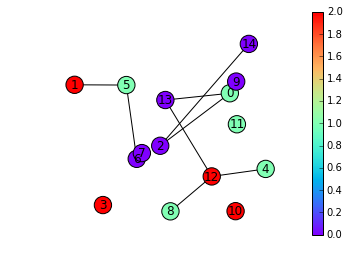

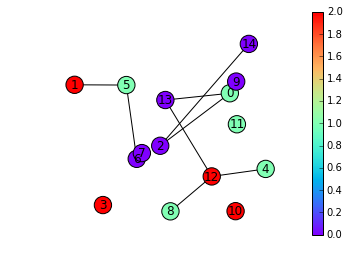

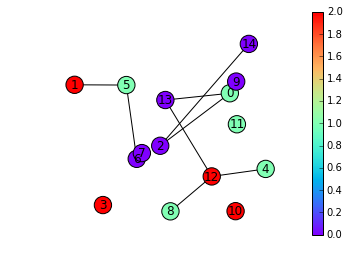

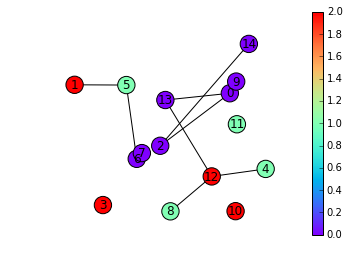

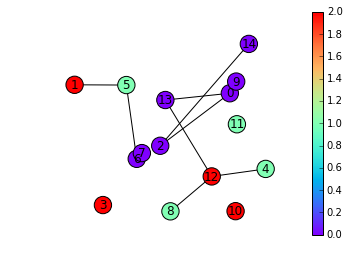

In [9]:
G = init_Graph()
groups = set(nx.get_node_attributes(G,'opinion').values())
mapping = dict(zip(sorted(groups),count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['opinion']] for n in nodes]
pos = nx.layout.random_layout(G)
es = nx.draw_networkx_edges(G, pos, alpha=1) 
ns = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=300, cmap=plt.cm.rainbow)
nx.draw_networkx_labels(G, pos=pos)
plt.colorbar(ns)
plt.axis('off')
plt.show()

for i in range(iter_process):
    if random.uniform(0, 1) < phi:
        process1()
    else:
        process2()
        colors = [mapping[G.node[n]['opinion']] for n in nodes]
        es = nx.draw_networkx_edges(G, pos, alpha=1) 
        ns = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=300, cmap=plt.cm.rainbow)
        nx.draw_networkx_labels(G, pos=pos)
        plt.colorbar(ns)
        plt.axis('off')
        plt.show()


